## Calculez le RMS de ce signal et retournez le en dB SPL.

In [4]:
import numpy as np      # Importer le module numpy
np.random.seed(0) 
x = np.random.random(1000)
print(x[:3]) 
meh = np.sqrt((x**2).mean())
## RMS du tableau
db = 20.0*np.log10(meh*20e-6)
print(db)

[0.5488135  0.71518937 0.60276338]
-98.7891856336499


In [8]:
np.random.seed(0)
y = np.random.random((100, 320, 240, 3))
# [:,::2] => colonnes
# interpretation des slices Commence à 0, jusqu'à la fin avec un step à 2
y[::2,::2] = 0 # Des images paires on veut les lignes paires
#y[::2,::2,:,:] = 0 # Des images paires on veut les lignes paires
y[1::2, 1::2, :,:] = 0
print(y[:3,:4,:4,0])



[[[0.         0.         0.         0.        ]
  [0.75102165 0.89569129 0.69078478 0.36454463]
  [0.         0.         0.         0.        ]
  [0.31840293 0.78903597 0.41464415 0.66176359]]

 [[0.26917506 0.1927614  0.66794884 0.06779536]
  [0.         0.         0.         0.        ]
  [0.06870976 0.12801903 0.13530805 0.72197953]
  [0.         0.         0.         0.        ]]

 [[0.         0.         0.         0.        ]
  [0.52556181 0.46489916 0.73705514 0.41742476]
  [0.         0.         0.         0.        ]
  [0.53673772 0.77686241 0.56715143 0.49911269]]]


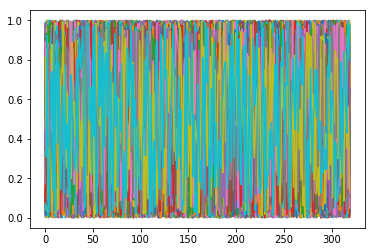

In [9]:
y = np.random.random((100, 320, 240))
import matplotlib.pyplot as plt
plt.plot(y[0])
plt.show()


151
(705,)


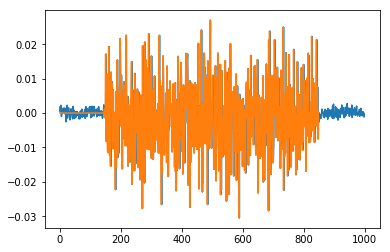

In [10]:
np.random.seed(0)
z = np.random.randn(1000)*0.001
z[150:-150] *= 10
import matplotlib.pyplot as plt
plt.plot(z)
#plt.show()
new = np.where(z>0.005)

index = new[0][0]
print(index)
filterd = z[new[0][0]-5:new[0][-1]+5]

# Concaténation utile juste pour les voir se superposer
meh = np.concatenate((np.zeros(145),filterd))
plt.plot(meh)

print(filterd.shape)
#plt.show()


## TD: Numpy Cont :

Nous avons un long signal x à analyser (10000 échantillons). Nous allons le découper un plus petits
morceaux non superposés (512 échantillons chaque morceau).
Créer un boucle pour découper le signal et collectionner tous les morceaux dans un nouveau
array.
np.random.seed(0); x = np.random.randn(10000)

nb elements :  19


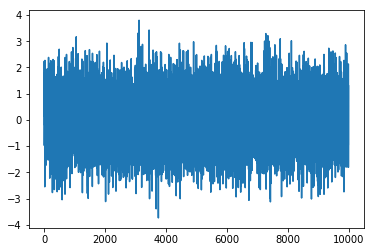

512|512|512|512|512|512|512|512|512|512|512|512|512|512|512|512|512|512|512|272|

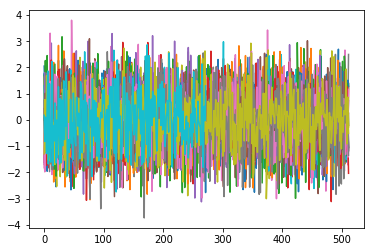

In [13]:
np.random.seed(0); x = np.random.randn(10000)
sliced = []
n = 512
print('nb elements : ', x.shape[0]//512)

for i in range(0,x.size, n):
    sliced.append(x[i:i+n])
plt.plot(x)
plt.show()

for i in range(len(sliced)):
    print(sliced[i].size, end='|')
    plt.plot(sliced[i])
    


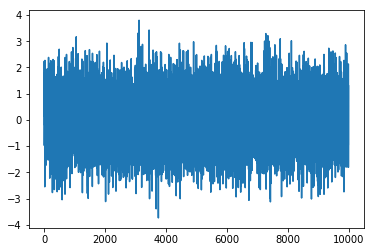

256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|256|16|

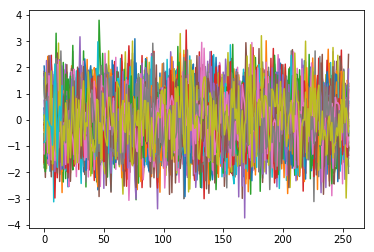

In [12]:
np.random.seed(0); x = np.random.randn(10000)

sliced = []
n = 256
for i in range(0,x.size, n):
    sliced.append(x[i:i+n])
plt.plot(x)
plt.show()

for i in range(len(sliced)):
    print(sliced[i].size, end='|')
    plt.plot(sliced[i])

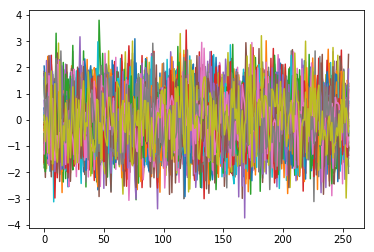

In [44]:
np.random.seed(0); x = np.random.randn(10000)
frame_size = 256
nb_frames = x.shape[0]// frame_size

frames = np.zeros((nb_frames, frame_size))
for i in range(nb_frames):
    frame = x[frame_size*i:frame_size*(i+1)]
    frames[i, :] = frame

for i in range(nb_frames):
   plt.plot(frames[i])

37


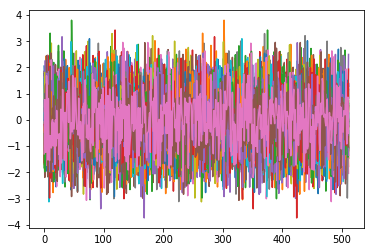

In [7]:
import matplotlib.pyplot as plt

np.random.seed(0); x = np.random.randn(10000)
frame_size = 512
frame_step = 256
nb_frames = (x.size-frame_size)//frame_step
print(nb_frames)

frames = np.zeros((nb_frames, frame_size))
for i in range(nb_frames):
    frame = x[i*frame_step:frame_size+(i*frame_step)]
    frames[i, :] = frame

for i in range(nb_frames):
   plt.plot(frames[i])


In [28]:
import numpy as np      # Importer le module numpy
sr = 8000               # sample_rate
duration = 2            # secondes
x = np.zeros(duration*sr)
#t = array [ 0 1/8000 2/8000 etc]
t = np.arange(duration, sr) / sr
print(t)

[2.50000e-04 3.75000e-04 5.00000e-04 ... 9.99625e-01 9.99750e-01
 9.99875e-01]


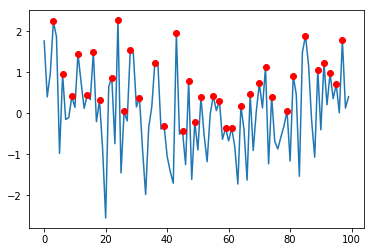

In [91]:
np.random.seed(0)
w = np.random.randn(100)
sliced = []
n = 100
for i in range(0,w.size, n):
    sliced.append(w[i:i+n])
plt.plot(w)


center = w[1:-1]
left_w = w[0:-2]
right_w = w[2:]
mask = (center > left_w) & (center > right_w)
peak = np.where(mask)[0] + 1

plt.plot(peak, w[peak], 'ro') # mygoddylanwtf
